# Exploratory Data Analysis (EDA) of Telco Domain Customer Churn

## 1.) Introduction

<div style='text-align: justify;'>
The telco industry is well-known for its competitiveness and its focus on cutting-edge technologies. To retain customers in this industry, it is crucial to prioritize their needs and provide them with a positive user experience. When customers feel valued and their needs are met, they are more likely to remain loyal. However, if they experience a poor user experience, they may choose to switch to a different network, resulting in churn. It goes without saying that retaining existing customers is less expensive than acquiring new customers. Thus it is cruicial to create predictive models that can identify customers who are more likely to switch networks, and take appropriate actions to prevent churn.

The following project is about conducting exploratory data analysis on a customer dataset to identify patterns and trends related to customer behavior and usage. The data analysis is carried out prior to building predictive models that can identify the customers who are most likely to churn.
</div>

## 2.) Problem Statement

<div style='text-align: justify;'>
XYZ company has observed a significant churn rate in the past month and wants to proactively identify potential customers who are likely to churn in order to take preemptive measures to retain them.
</div>

## 3.) Objective

<div style='text-align: justify;'>
The objective of this project is to explore the relationship between customer churn and various demographic information and services provided by analyzing any potential patterns and relationships within the data, identify anomalies and assumptions that should be made before data modeling.
</div>

## 4.) Data Collection and Data Wrangling

<div style='text-align: justify;'>
The dataset is taken from Kaggale. Related libraries are imported to read, write data in various formats, clean, transform data, and perform analysis.
</div>


In [3]:
#importing libraries for data frames

import numpy as np 
import pandas as pd

In [4]:
#importing libraries for statistical data visualizations

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
#Importing libraries of classification algorithms

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
!pip install xgboost 
!pip install imblearn
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [5]:
#Importing metrics and functions related to model evaluation
#Following can be used after training and testing the classification model to evaluate its performance on the test data.

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [6]:
#Importing data scaling or normalization techniques

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [7]:
#Ignore any warning messages during the execution of the code
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Read the csv file
df = pd.read_csv('Telco-Customer-Churn.csv')

<div style='text-align: justify;'>
Data wrangling is done by identifying and correcting errors, inconsistencies in the dataset. Following process involved imputing missing data, correcting spelling and formatting errors. Also Data formatting involved ensuring that the data is in a format that is suitable for analysis. Let us first see the number of columns and rows we have in the data frame.
</div>

In [11]:
#Quick view on the dataset
df.shape

(7043, 21)

In [271]:
#Display first 10 rows from the top and bottom to have a quick glance of the data set
display(df.head(5))
display(df.tail(5))

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
1,Male,No,No,Yes,0,Yes,No,No,No internet,No internet,No internet,No internet,No internet,No internet,Two year,No,Mailed check,20.25,0.0,No
2,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
3,Male,No,Yes,Yes,0,Yes,Yes,No,No internet,No internet,No internet,No internet,No internet,No internet,Two year,No,Mailed check,25.75,0.0,No
4,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Female,No,Yes,Yes,1,Yes,No,No,No internet,No internet,No internet,No internet,No internet,No internet,Month-to-month,Yes,Mailed check,19.00,19.00,No
7039,Male,No,No,No,1,Yes,No,No,No internet,No internet,No internet,No internet,No internet,No internet,Month-to-month,No,Mailed check,18.90,18.90,No
7040,Female,No,No,No,1,Yes,No,No,No internet,No internet,No internet,No internet,No internet,No internet,Month-to-month,No,Electronic check,18.85,18.85,No
7041,Male,No,No,No,1,Yes,No,No,No internet,No internet,No internet,No internet,No internet,No internet,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
7042,Male,No,Yes,Yes,1,Yes,No,No,No internet,No internet,No internet,No internet,No internet,No internet,One year,No,Mailed check,18.80,18.80,No


In [10]:
#View the data type and the number of columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<div style='text-align: justify;'>
As can be seen TotalCharges is in object format. Let us covert it to float. And see the number of null values in each column. It seems under TotalCharges there are 11 null values.
</div>

In [267]:
#convert object datatype to numeric datatype using the 'to_numeric' method in total charges column. Any values that cannot be converted to numeric set to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
print(df.isnull().sum())

<div style='text-align: justify;'>Having looked at the rows where Total Charges is null, it is assumed that these customers have still not paid any charges. Therefore the TotalCharges will be filled with zero. </div>

In [277]:
#Replace nan with 0.

df['TotalCharges'] = df['TotalCharges'].fillna(0)
df[df['TotalCharges'] == 0]
#Filters the rows of the data frame where the TotalCharges column has a NaN value.
df[np.isnan(df['TotalCharges'])]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


<div style='text-align: justify;'>We will not take CustomerID into consideration with regards to Churn. Therefore we will drop CustomerID coulmn from the data frame.</div>

In [23]:
#Data Manipulations-Drop Customer ID
df.drop(columns= 'customerID', axis=1, inplace=True)

In [25]:
display(df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
2,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
4,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19,No
7039,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.9,No
7040,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
7041,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes


<div style='text-align: justify;'>Let's standardize the column headers in a consistent format for better readability.</div>

In [12]:
df = df.rename(columns={'gender': 'Gender', 'tenure': 'Tenure'})

In [264]:
#For more readibilty replace "No internet service" with "No internet" and 1 and 0 with Yes and No respectively.

df.replace("No internet service", "No internet", inplace=True)
df['SeniorCitizen']=df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

In [266]:
#View the new data frame after data wrangling
df.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
1,Male,No,No,Yes,0,Yes,No,No,No internet,No internet,No internet,No internet,No internet,No internet,Two year,No,Mailed check,20.25,0.0,No
2,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
3,Male,No,Yes,Yes,0,Yes,Yes,No,No internet,No internet,No internet,No internet,No internet,No internet,Two year,No,Mailed check,25.75,0.0,No
4,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
5,Male,No,Yes,Yes,0,Yes,No,No,No internet,No internet,No internet,No internet,No internet,No internet,Two year,No,Mailed check,19.85,0.0,No
6,Male,No,Yes,Yes,0,Yes,Yes,No,No internet,No internet,No internet,No internet,No internet,No internet,Two year,No,Mailed check,25.35,0.0,No
7,Female,No,Yes,Yes,0,Yes,No,No,No internet,No internet,No internet,No internet,No internet,No internet,Two year,No,Mailed check,20.00,0.0,No
8,Male,No,Yes,Yes,0,Yes,No,No,No internet,No internet,No internet,No internet,No internet,No internet,One year,Yes,Mailed check,19.70,0.0,No
9,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [260]:
for column in df.columns:
    if df[column].nunique() == 2:
        print(column)

Gender
SeniorCitizen
Partner
Dependents
PhoneService
PaperlessBilling
Churn


## 5.) Exploratory Data Analysis

<div style='text-align: justify;'>
    5.1 Demographic Analysis

The data frame contains demographic variables such as gender, senior citizen, dependent, and partner, which are all binary variables with two possible values. We will examine the distribution of each variable within the data frame and then split the data into two categories: one for customers who churned and another for those who did not. Finally, we will analyze the distribution of demographic attributes in comparison to churn to determine if there is an impact on the churn rate. </div>

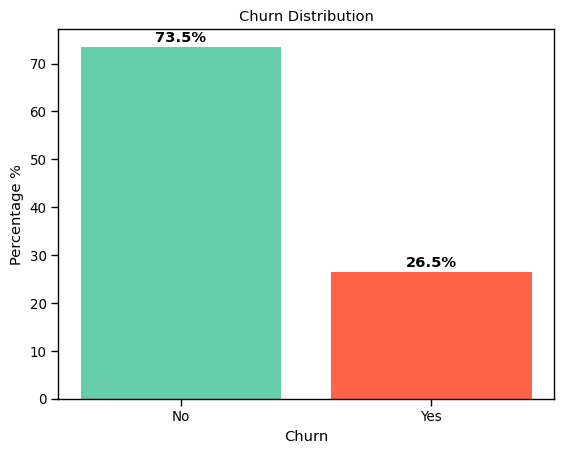

In [287]:
# Calculate percentage of churn values in the Churn column
churn_pct = df['Churn'].value_counts(normalize=True) * 100

# Plot the percentage of churn values as a bar chart
plt.bar(churn_pct.index, churn_pct.values, color=['mediumaquamarine', 'tomato'])

# Add data labels to the bars
for i, v in enumerate(churn_pct.values):
    plt.text(i, v + 1, f"{v:.1f}%", color='black', fontweight='bold', ha='center')

plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Percentage %')
plt.show()


<div style='text-align: justify;'>The bar chart displays an unequal distribution of the response variable, indicating that the "Yes" class makes up the majority of instances (73%), while the "No" class only represents 27%. This suggests that there is a significant disparity in the number of instances between the two classes, which may lead to biased model performance. This issue will be tackled during the feature engineering and modeling phases. Additionally, we examined the distribution of binary variables across the demographic categories and compared them with the count of churn. </div> 

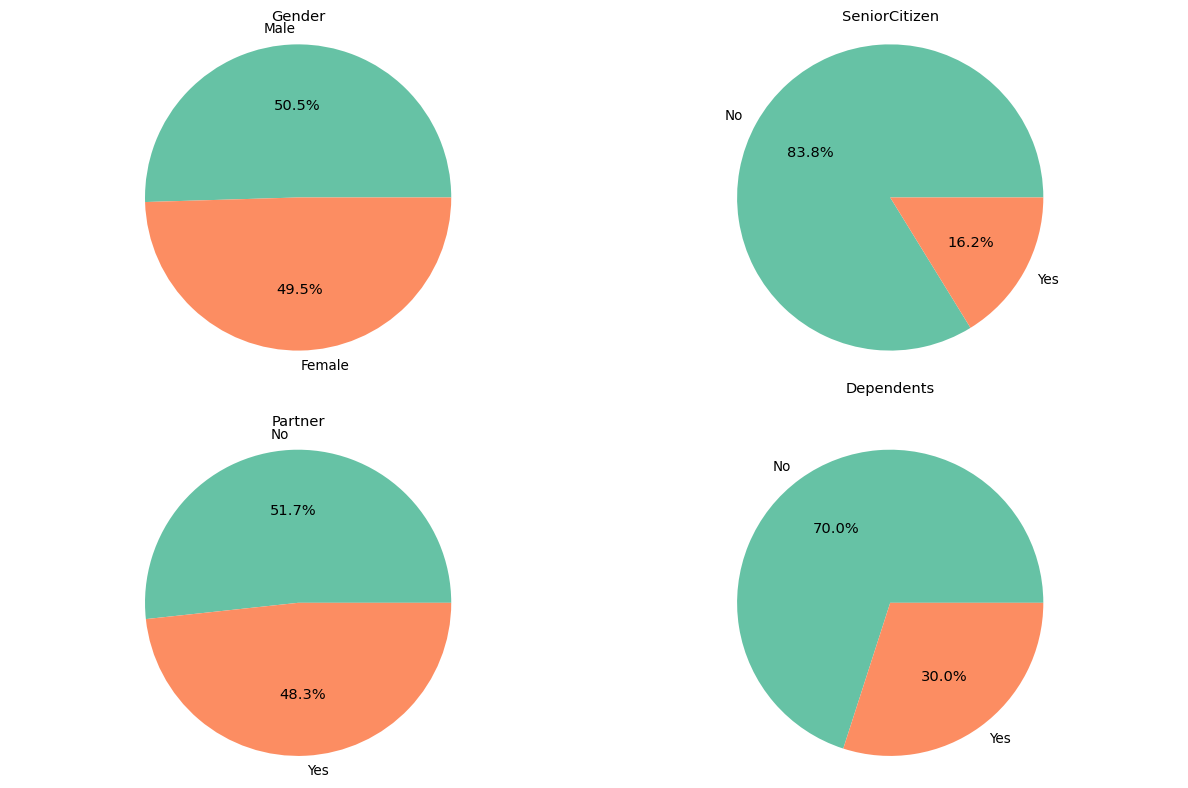

In [289]:
# Create a list of the columns you want to plot pie charts for
cols_to_plot = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Define the color palette to use
colors = sns.color_palette('Set2')

# Create a loop to plot pie charts for each column
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
for i, col in enumerate(cols_to_plot):
    # Count the frequency of each value in the column
    counts = df[col].value_counts(normalize=True)

    # Create a pie chart with the counts
    ax = axes[i//2, i%2]
    ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%',colors=colors) # Create the pie chart
    ax.set_title(col) # Add the column name as the title
    ax.axis('equal')

# Add the column name as the title with spacing of 20 units
plt.title(col, pad=30)
plt.tight_layout()
plt.show() # Show the chart



<div style='text-align: justify;'>
While the gender and partner categories have a balanced distribution, the senior citizen category is highly imbalanced, with 84% belonging to the "No" class and only 16% belonging to the "Yes" class. Below analysis shows customers who live with a partner tend to have a lower churn rate compared to those who don't. Similarly, customers without dependents are more likely to churn than those with dependents. In terms of churn rate, gender does not appear to have any significant impact.</div>

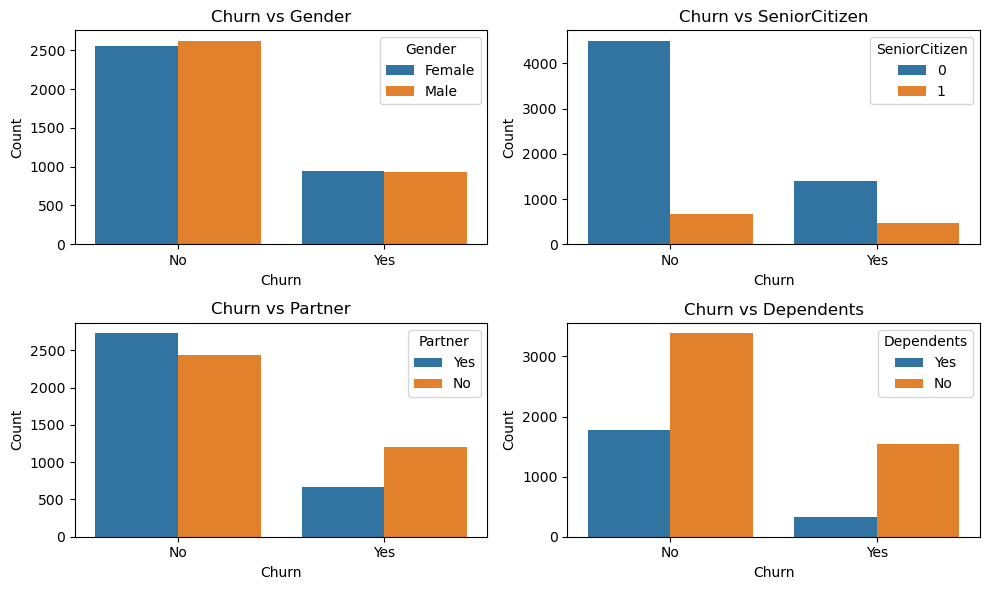

In [14]:
cols = ['Gender', 'SeniorCitizen', 'Partner','Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6)) # 2x2 grid of plot

for i, ax in enumerate(axes.flat): # enumerate function is used to loop through each subplot in the grid
    if i < len(cols):
        sns.countplot(data=df, x='Churn', hue=cols[i], ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel('Churn')
        ax.set_ylabel('Count')
        
plt.tight_layout() # ensuring that each plot is evenly spaced within the figure
plt.show()

5.2 Payment Information Categorial Analysis

<div style='text-align: justify;'>The payment method information was analyzed categorically. The pie chart below illustrates that the payment methods are distributed equally among the customers. It is observed that customers who use electronic checks as a payment method are more likely to leave the company. Also the churn rate is higher among customers with month-to-month contracts as opposed to those with yearly contracts. Similarly, customers who have subscribed to paperless billing are more prone to churning compared to those who haven't subscribed. This indicates that customers who use electronic payment systems may face problems related to the usability of the interface (which may not be user-friendly) or security issues with their transactions.</div>

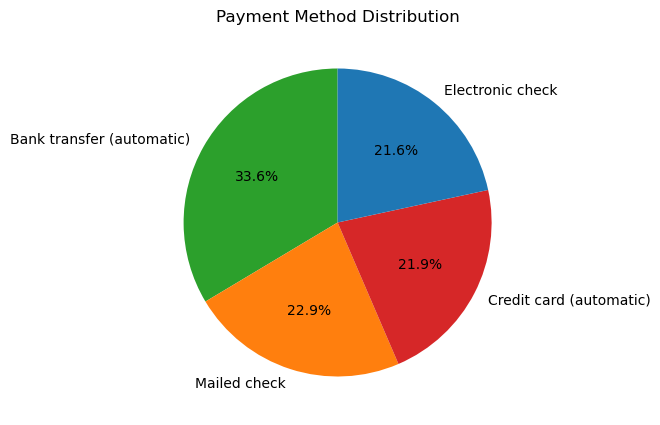

In [6]:
# create data
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

# define colors
colors = ['tab:green', 'tab:orange', 'tab:red', 'tab:blue']

# create pie chart
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(values, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

# add title
ax.set_title('Payment Method Distribution')
plt.show()

Let's take a look at the distribution of payments in tabular form.

In [153]:
# Calculate the percentage of each payment method with respect to churn
churn_payment_method_counts = df.groupby(['PaymentMethod', 'Churn'])['Churn'].count() / df.groupby('PaymentMethod')['Churn'].count() * 100

# Print the result
print(payment_method_counts)
churn_payment_method_counts

Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64


PaymentMethod              Churn
Bank transfer (automatic)  No       83.290155
                           Yes      16.709845
Credit card (automatic)    No       84.756899
                           Yes      15.243101
Electronic check           No       54.714588
                           Yes      45.285412
Mailed check               No       80.893300
                           Yes      19.106700
Name: Churn, dtype: float64

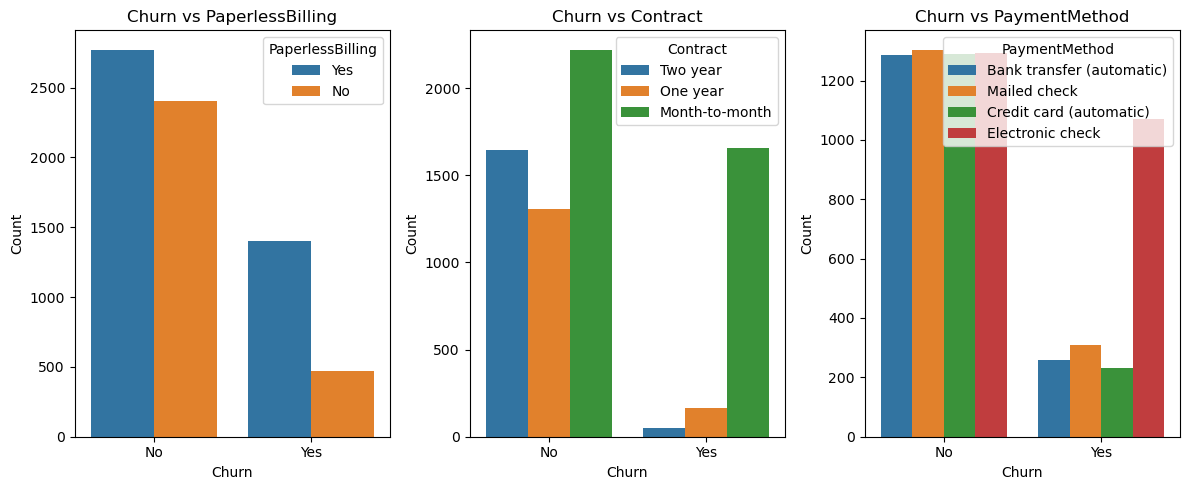

In [17]:
multicolumns = df[['Churn', 'PaperlessBilling','Contract','PaymentMethod']]
cols = multicolumns.columns[1:]

#creating a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=multicolumns, x='Churn', hue=cols[i], ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        
        #labeling the x and y axes
        ax.set_xlabel('Churn')
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

5.2 Payment Information Numerical Analysis

<div style='text-align: justify;'>The following plots indicate that customers who pay higher monthly charges, specifically in the range of 70 to 110, are more likely to churn. Additionally, customers who have recently joined the company and have a lower tenure are also more prone to churning.</div>

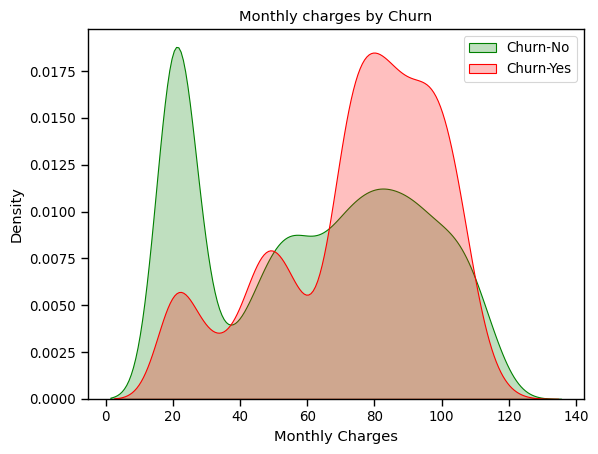

In [159]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Green", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True);

# Set the axis labels and title
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly charges by Churn');

# Move the legend to avoid covering important information in the plot
ax.legend(["Churn-No","Churn-Yes"],loc='upper right',bbox_to_anchor=(1, 1));


In [18]:
print(df.columns)

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


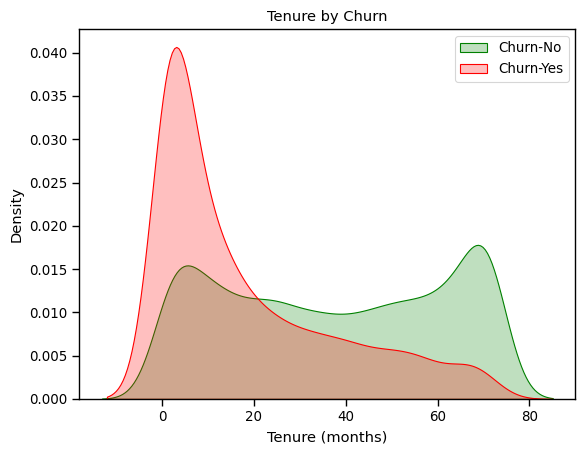

In [160]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Tenure[(df["Churn"] == 'No') ],
                color="Green", shade = True);
ax = sns.kdeplot(df.Tenure[(df["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True);

# Set the axis labels and title
ax.set_ylabel('Density');
ax.set_xlabel('Tenure (months)');
ax.set_title('Tenure by Churn');

# Move the legend to avoid covering important information in the plot
ax.legend(["Churn-No","Churn-Yes"],loc='upper right',bbox_to_anchor=(1, 1));

As can be seen from above graph customers are more likely to stay in the network as their tenure increases.

5.3 Services Information Categorial Analysis

Based on the percentage proportion of churn, it appears that streaming movies and streaming TV may not have a significant impact on the customer's decision to churn.

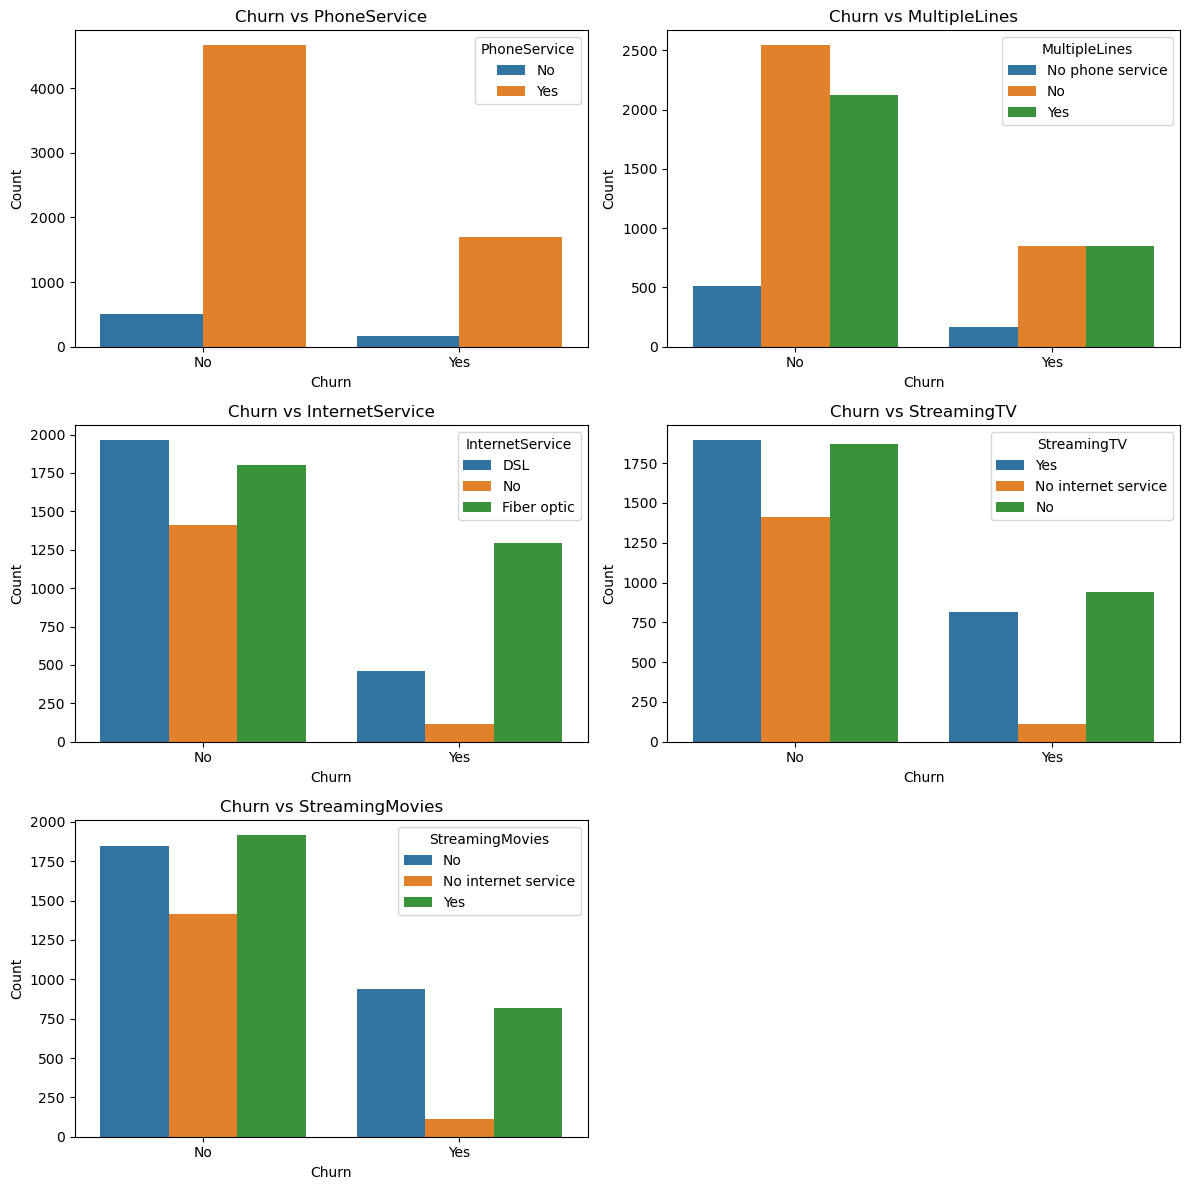

In [21]:
multicolumns = df[['Churn', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']]
cols = multicolumns.columns[1:]


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=multicolumns, x='Churn', hue=cols[i], ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel('Churn')
        ax.set_ylabel('Count')
    else:
        fig.delaxes(ax)
plt.tight_layout()
plt.show()

Despite the fact that fiber optic internet service is known to be much faster and more reliable in terms of data speed, the churn rate is observed to be higher for fiber optic customers. This could be due to the price range offered by the service. Let us take a look at the monthly charges for each service to explore this further.

In [117]:
df[['InternetService', 'MonthlyCharges']].groupby('InternetService').mean().sort_values(by='MonthlyCharges')

,MonthlyCharges
InternetService,
No,21.079194
DSL,58.102169
Fiber optic,91.500129


According to the data, the price of fiber optic service is higher than DSL, which could be a possible reason why customers churn.

5.4 Security attributes and technical support analysis

<div style='text-align: justify;'>Security is a crucial factor in the telecom industry. Customers also look for online security backups and redundancy, as well as internet security measures to safeguard their sensitive data. It is evident that the absence of these security features could be a significant reason for customers to churn from a network. Customers place a high value on online technical support when their network experiences are or when they have poor connectivity to resolve the issues. The absence of these security features can be a major factor in customers' decision to churn from a network. Therefore, it is crucial to examine the facts in detail.</div>

In [182]:
pd.crosstab(df.Churn,[df.TechSupport])

TechSupport,No,No internet service,Yes
Churn,,,
No,2027,1413,1734
Yes,1446,113,310


In [233]:
# Define the list of column names
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Loop through each column and create a crosstab table
for col in cols:
    table = pd.crosstab(df['Churn'], df[col], normalize='index') * 100
    table = table[['No', 'Yes']] # Select only the 'No' and 'Yes' columns
    print(f'{col} vs Churn')
    print(table.to_string())
    print('\n')

OnlineSecurity vs Churn
OnlineSecurity         No        Yes
Churn                               
No              39.369927  33.320448
Yes             78.170144  15.783842


OnlineBackup vs Churn
OnlineBackup         No        Yes
Churn                             
No            35.852339  36.838036
Yes           65.971108  27.982879


DeviceProtection vs Churn
DeviceProtection         No        Yes
Churn                                 
No                36.412833  36.277542
Yes               64.794007  29.159979


TechSupport vs Churn
TechSupport         No        Yes
Churn                            
No           39.176652  33.513722
Yes          77.367576  16.586410




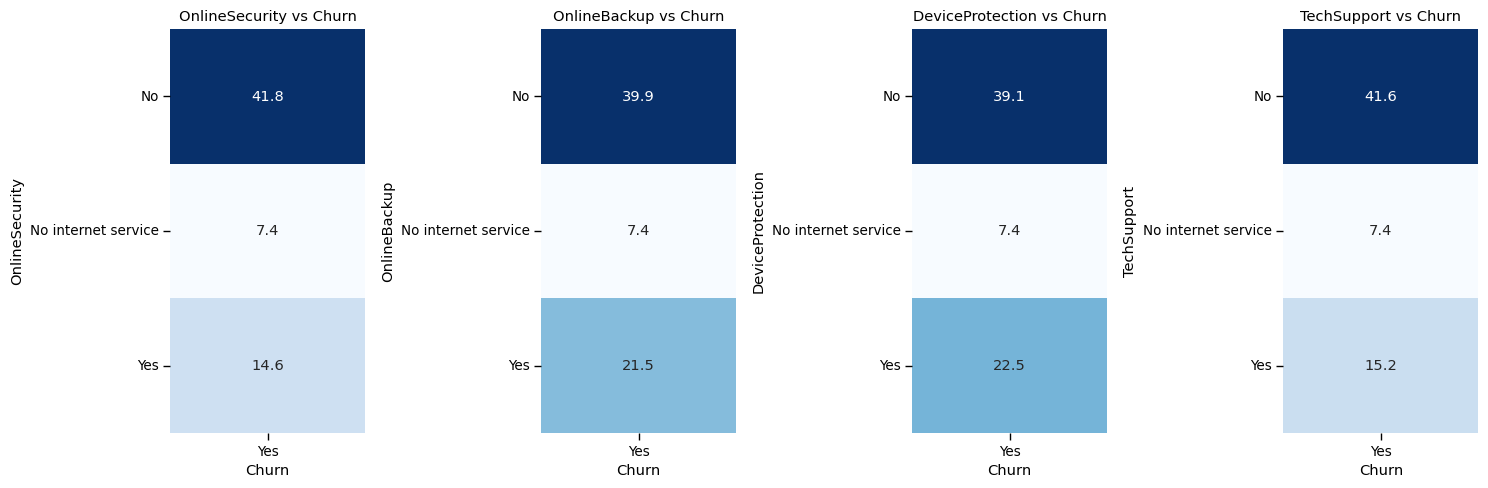

In [243]:
# Define the list of columns to create heatmaps for
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Create a figure with a 1x4 grid of subplots, and set the figure size
fig, axs = plt.subplots(1, len(cols), figsize=(15, 5))

# Loop through each column and create a heatmap in the corresponding subplot
for i, col in enumerate(cols):
    
    # Calculate the crosstab table, selecting only the 'Yes' column
    table = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    table = table[['Yes']]
    
    # Plot the table as a heatmap using Seaborn, in the i-th subplot
    sns.heatmap(table, cmap='Blues', annot=True, fmt='.1f', cbar=False, ax=axs[i])
    
    # Set the title of the plot to the column name
    axs[i].set_title(f'{col} vs Churn')
    
    # Rotate the y-axis labels for readability
    axs[i].set_yticklabels(axs[i].get_yticklabels(), rotation=0)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Based on the charts presented above, it is evident that customers tend to churn if there is a lack of online security, backup, device protection, and technical support. This highlights the importance of having a network that offers reliable security measures and 24/7 customer care service and technical support to retain customers.

# 6 Conclusion

The data analysis above indicates the following conclusions:

- Customers who use electronic check as a payment method are more likely to churn.
- Customers with Fiber Optic line are more likely to churn from the network.
- Monthly customers, who have no contract terms and are free to leave at any time, are more likely to churn.
- Customers who do not have access to online security, tech support, and backup services are at a higher risk of churning.
- The churn rate increases with higher monthly charges.
- New customers with low tenure are more likely to churn.
- Customers with high total charges are less likely to leave the company.

Now that we have analyzed the dataset and drawn some insights regarding the relationship between churn rate and various attributes such as demographics and payment methods, it is time to move on to modeling the dataset.